In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import netCDF4 as nc

In [2]:
def search_carrots_index(month, date):
    index = 0
    month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    for i in range(month):
        index = index + month_date[i]
    index = index + date
    index = index + 1
    
    return index

In [7]:
index = search_carrots_index(6, 20)
print(index)

172


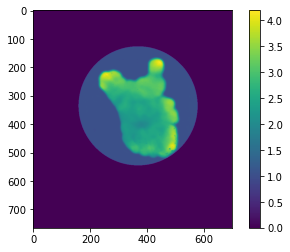

In [3]:
factor = np.zeros((368, 765, 700))
file_name_CARROTS = "E:/thesis_code/CARROT/RadarBiasCorrectionFactors_NL.nc"
factor1 = nc.Dataset(file_name_CARROTS)
factor1 = factor1['factor']

for i in range(368):
    factor[i] = 1 / factor1[i]



plt.imshow(factor[10])
plt.colorbar()
plt.show()


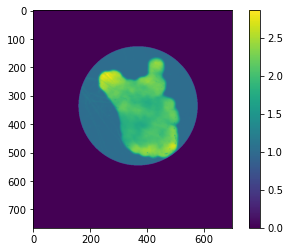

In [14]:
plt.imshow(factor[300])
plt.colorbar()
plt.show()

In [4]:
def calculate_mse_and_mae(f_origin, f_processed):
    MSE = 0
    MSE1 = 0
    MAE = 0
    MAE1 = 0

    '''
    year = 2013
    month = 6
    date = 20
    hour = 13
    minute = 0
    '''

    i = 0

    for x in range(0, 765):
        for y in range(0, 700):
            if f_origin[x][y] < 5000 and f_processed[x][y] < 5000:
                MSE = MSE + (f_processed[x][y] - f_origin[x][y])**2
                MAE = MAE + abs(f_processed[x][y] - f_origin[x][y])

                i = i + 1


    if i != 0:
        MSE = MSE / i
        MAE = MAE / i
    
    return [MSE, MAE]

In [9]:
MSE = 0
MSE_carrot = 0
MAE = 0
MAE_carrot = 0

month_date = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
year = 2017
hour = 12
minute = 30



if minute < 10:
    mnt = "0" + str(minute)
else:
    mnt = str(minute)

for month in range(1, 13):
    for date in range(1, month_date[month] + 1):
        for hour in range(0, 24, 12):
            
            i = 0
            j = 0
            index = search_carrots_index(month, date)

            if month < 10:
                mth = "0" + str(month)
            else:
                mth = str(month)

            if date < 10:
                dt = "0" + str(date)
            else:
                dt = str(date)
                
            if hour < 10:
                hr = "0" + str(hour)
            else:
                hr = str(hour)

            print(str(year) + "." + mth + "." + dt + " " + hr + ":30" )

            filename_MFBS = "E://thesis_datasets/RADNL_CLIM_EM_MFBSNL25_05m_" + str(year - 1) + "1231T235500_" + str(year) + "1231T235500_0002/RAD_NL25_RAC_MFBS_EM_5min/" + str(year) + "/" + mth + "/" + \
                                "RAD_NL25_RAC_MFBS_EM_5min_" + str(year) + mth + dt + hr + mnt + "_NL.h5"
            #print(filename_MFBS)

            f = h5py.File(filename_MFBS)['image1']['image_data']
            f = np.array(list(f))
            #f = np.where(f == 65535, -1, f) 
            #f = np.ma.masked_where(f <= 0, f)
            f = f / 100
            f = f * 12
            filename_RT = "F://"+ str(year) + "//" + mth + "//" + \
            "RAD_NL25_RAP_5min_" + str(year) + mth + dt + hr + mnt + ".h5"
            f1 = h5py.File(filename_RT)['image1']['image_data']
            f1 = np.array(list(f1))
            #f1 = np.where(f1 == 65535, -1, f1) 
            #f1 = np.ma.masked_where(f1 <= 0, f1)
            f1 = f1 / 100
            f1 = f1 * 12

            [MSE_temp, MAE_temp] = calculate_mse_and_mae(f, f1)
            MSE = MSE + MSE_temp
            MAE = MAE + MAE_temp
            print("Current MSE is:" + str(MSE))
            print("Current MAE is:" + str(MAE))

            processed_image = np.zeros((765, 700))
            for x in range(0, 765):
                for y in range(0, 700):
                    if(f1[x][y] < 5000):
                        processed_image[x][y] = f1[x][y] * factor[index][764- x][y]

            [MSE_temp, MAE_temp] = calculate_mse_and_mae(f, processed_image)
            MSE_carrot = MSE_carrot + MSE_temp
            MAE_carrot = MAE_carrot + MAE_temp
            print("Current MSE_carrot is:" + str(MSE_carrot))
            print("Current MAE_carrot is:" + str(MAE_carrot))

    
    



2017.01.01 00:30


C:\Users\zywang\AppData\Local\Temp/ipykernel_334068/3213323161.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename_MFBS)['image1']['image_data']
C:\Users\zywang\AppData\Local\Temp/ipykernel_334068/3213323161.py:56: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5py.File(filename_RT)['image1']['image_data']


Current MSE is:0.006007858052709974
Current MAE is:0.009238055939288583
Current MSE_carrot is:0.0054736466121750975
Current MAE_carrot is:0.008890178418265992
2017.01.01 12:30
Current MSE is:0.023587333823714272
Current MAE is:0.02680134196881947
Current MSE_carrot is:0.016375886713578848
Current MAE_carrot is:0.02180051174313352
2017.01.02 00:30
Current MSE is:0.12342679990672942
Current MAE is:0.16329679398622166
Current MSE_carrot is:0.05077062237022224
Current MAE_carrot is:0.07490659581692771
2017.01.02 12:30
Current MSE is:0.21344210696283133
Current MAE is:0.19796264733845206
Current MSE_carrot is:0.0865298612241995
Current MAE_carrot is:0.09749413593954036
2017.01.03 00:30
Current MSE is:0.23672898329717532
Current MAE is:0.2107895728304775
Current MSE_carrot is:0.09760698625204767
Current MAE_carrot is:0.10505799975243044
2017.01.03 12:30
Current MSE is:0.23993326037426674
Current MAE is:0.22054432264658497
Current MSE_carrot is:0.09884967815286017
Current MAE_carrot is:0.1106

In [10]:
print(year)
MSE = MSE/(365*12)
MAE = MAE/(365*12)
MSE_carrot = MSE_carrot/(365*12)
MAE_carrot = MAE_carrot/(365*12)

print("MSE is:" + str(MSE))
print("MAE is:" + str(MAE))
print("MSE_carrot is:" + str(MSE_carrot))
print("MAE_carrot is:" + str(MAE_carrot))

2017
MSE is:0.03543432201009222
MAE is:0.009403178758533779
MSE_carrot is:0.02163117148328609
MAE_carrot is:0.0071642772318695315


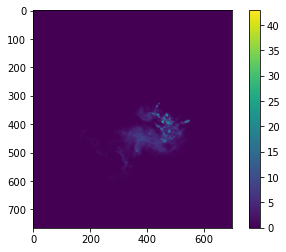

In [73]:
processed_image = np.zeros((765, 700))
for x in range(0, 765):
    for y in range(0, 700):
        if(f1[x][y] < 5000):
            processed_image[x][y] = f1[x][y] * factor[764- x][y]
plt.imshow(processed_image)
plt.colorbar()
plt.show()

In [74]:
i = 0
for x in range(0, 765):
    for y in range(0, 700):
        if (f[x][y] < 5000) and (processed_image[x][y] < 5000):
            MSE1 = MSE1 + (f[x][y] - processed_image[x][y])**2
            MAE1 = MAE1 + abs(f[x][y] - processed_image[x][y])
            i = i + 1
MSE1 = MSE1 / i
MAE1 = MAE1 / i
print("After CARROTS, the MSE is:" + str(MSE1))
print("After CARROTS, the MAE is:" + str(MAE1))

After CARROTS, the MSE is:5.739874860629055
After CARROTS, the MAE is:0.7855779321313503
